In [ ]:
#6hrs predection

Shape of X: (72, 72)
Shape of y: (72, 6)
Shape of X_train: (57, 72)
Shape of X_test: (15, 72)
Shape of y_train: (57, 6)
Shape of y_test: (15, 6)
Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 0.3334 - val_loss: 0.3047
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3118 - val_loss: 0.2901
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2957 - val_loss: 0.2748
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2729 - val_loss: 0.2577
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2529 - val_loss: 0.2370
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2386 - val_loss: 0.2116
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2186 - val_loss: 0.1800
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1800 - val_loss: 0.1413
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1486 - val_loss: 0.1153
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1276 - val_loss: 0.1314
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1277 - val_loss: 0.0961
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1042 - val_loss: 0.0887
Epoch 13/20

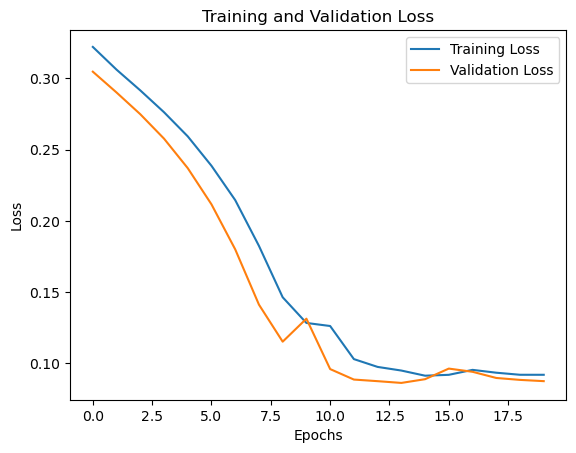

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted CO concentrations for the next 6 hours:
Hour 1: 4.16
Hour 2: 4.65
Hour 3: 4.92
Hour 4: 4.72
Hour 5: 4.02
Hour 6: 4.10


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('data/main/sensor_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# Resample the data to hourly averages (replace 'H' with 'h' to avoid the FutureWarning)
data = data.resample('h').mean()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Check if we have enough data for past_steps + future_steps
past_steps = 72  # 3 days of hourly data
future_steps = 6  # Predict the next 6 hours

# Check the data length
if len(data_scaled) <= past_steps + future_steps:
    raise ValueError(f"Not enough data to create sequences. Need at least {past_steps + future_steps} rows.")

# Prepare the data for LSTM
def prepare_data(data, past_steps, future_steps):
    X, y = [], []
    for i in range(len(data) - past_steps - future_steps):
        X.append(data[i:i+past_steps, 0])
        y.append(data[i+past_steps:i+past_steps+future_steps, 0])
    return np.array(X), np.array(y)

# Generate the input and output data
X, y = prepare_data(data_scaled, past_steps, future_steps)

# Debugging: Print shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Debugging: Print shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(past_steps, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(future_steps)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Predict the next 6 hours using the last 3 days of data
last_3_days = data_scaled[-past_steps:]
last_3_days = last_3_days.reshape(1, past_steps, 1)

predictions = model.predict(last_3_days)
predictions = scaler.inverse_transform(predictions)  # Rescale predictions to the original scale

# Print predictions
print("Predicted CO concentrations for the next 6 hours:")
for i, pred in enumerate(predictions[0]):
    print(f"Hour {i+1}: {pred:.2f}")


In [ ]:
# 6hrs predection

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.3573 - val_loss: 0.3336
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3436 - val_loss: 0.3190
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3165 - val_loss: 0.3053
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3116 - val_loss: 0.2923
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2876 - val_loss: 0.2796
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2726 - val_loss: 0.2664
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2627 - val_loss: 0.2524
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2509 - val_loss: 0.2370
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2377 - val_loss: 0.2189
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2149 - val_loss: 0.1968
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1962 - val_loss: 0.1676
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1654 - val_loss: 0.1289


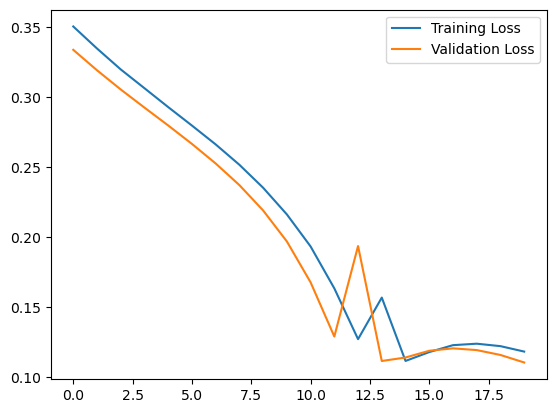

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted CO concentrations for the next 6 hours:
Hour 1: 4.40
Hour 2: 3.15
Hour 3: 3.99
Hour 4: 4.29
Hour 5: 2.41
Hour 6: 3.20


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/main/sensor_data.csv')

# Preprocess data
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Resample the data hourly and normalize CO concentration values
data = data.resample('h').mean()

# Extract CO concentration data
co_data = data['co_concentration'].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
co_data_scaled = scaler.fit_transform(co_data.reshape(-1, 1))

# Prepare the data for training
def create_dataset(data, time_step=72, forecast_horizon=6):
    X, y = [], []
    for i in range(len(data) - time_step - forecast_horizon):
        X.append(data[i:(i + time_step)])
        y.append(data[(i + time_step):(i + time_step + forecast_horizon)])
    return np.array(X), np.array(y)

# Create dataset with a time step of 72 hours and forecast horizon of 6 hours
X, y = create_dataset(co_data_scaled)

# Split the data into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape the data for LSTM: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model
model = Sequential()

# Use Input layer to specify the input shape
model.add(Input(shape=(X_train.shape[1], 1)))  # (time_steps, features)

# Add LSTM layer
model.add(LSTM(64, activation='relu', return_sequences=False))

# Add output layer for 6-hour prediction
model.add(Dense(6))  # Predict 6 values (1 per hour)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict the next 6 hours
predicted_values = model.predict(X_test[0].reshape(1, 72, 1))

# Inverse transform the predictions back to original scale
predicted_values = scaler.inverse_transform(predicted_values)

# Print the predictions for the next 6 hours
print("Predicted CO concentrations for the next 6 hours:")
for i, val in enumerate(predicted_values[0]):
    print(f"Hour {i + 1}: {val:.2f}")




In [ ]:
#predection + accuracy finder

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.1994 - loss: 0.3079 - val_accuracy: 0.1333 - val_loss: 0.2778
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1785 - loss: 0.2665 - val_accuracy: 0.1333 - val_loss: 0.2534
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1785 - loss: 0.2508 - val_accuracy: 0.1333 - val_loss: 0.2293
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1994 - loss: 0.2337 - val_accuracy: 0.1333 - val_loss: 0.2051
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1577 - loss: 0.2109 - val_accuracy: 0.1333 - val_loss: 0.1808
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1785 - loss: 0.1819 - val_accuracy: 0.1333 - val_loss: 0.1571
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2306 - loss: 0.1559 - val_accuracy: 0.1333 - val_loss: 0.1380
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1889 - loss: 0.1379 - val_accuracy: 0.1333 - val_loss: 0.1300
Epoch 9/20

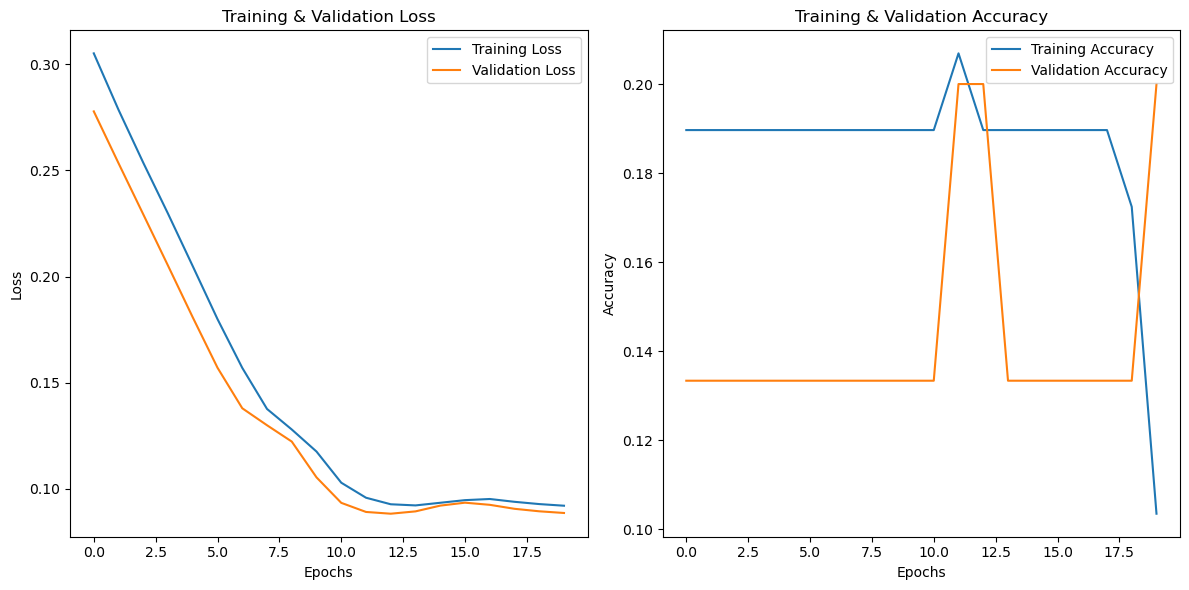

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted CO concentrations for the next 6 hours:
Hour 1: 5.11
Hour 2: 4.37
Hour 3: 4.83
Hour 4: 4.57
Hour 5: 4.71
Hour 6: 5.01
Final validation accuracy: 0.2000


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data (use the path where you saved the dataset)
data = pd.read_csv('data/main/sensor_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# Resample data to hourly values
data = data.resample('h').mean()

# Let's assume CO is the column we're trying to predict
co_data = data['co_concentration'].values

# Rescale the data to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
co_data_scaled = scaler.fit_transform(co_data.reshape(-1, 1))

# Prepare the data for LSTM (previous 72 hours to predict next 6 hours)
def create_dataset(data, time_step=72, forecast_horizon=6):
    X, y = [], []
    for i in range(len(data) - time_step - forecast_horizon + 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[(i + time_step):(i + time_step + forecast_horizon), 0])
    return np.array(X), np.array(y)

X, y = create_dataset(co_data_scaled)

# Train-test split
split = int(0.8 * len(X))  # 80% for training, 20% for testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for LSTM input (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=6))  # Predicting the next 6 hours

# Compile the model with accuracy metric
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model and track the accuracy
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the loss and accuracy graphs
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Predict CO concentrations for the next 6 hours
predictions_scaled = model.predict(X_test[:1])  # Predicting the first test sample
predictions = scaler.inverse_transform(predictions_scaled)

# Print the predicted CO concentrations for the next 6 hours
print("Predicted CO concentrations for the next 6 hours:")
for i, val in enumerate(predictions[0]):
    print(f"Hour {i + 1}: {val:.2f}")

# Calculate the validation accuracy (if needed, using custom metrics)
validation_accuracy = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {validation_accuracy:.4f}")
